<a href="https://colab.research.google.com/github/seleneclark/MachineLearning/blob/main/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Prediction

## Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

In [ ]:
income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

## Prepare Data

In [ ]:
income.rename(columns={'39': 'age', ' State-gov': 'workclass', ' 77516': 'final_weight', ' Bachelors': 'education', ' 13': 'education_level', ' Never-married': 'marital_status', ' Adm-clerical': 'occupation', ' Not-in-family': 'relationship', ' White': 'race', ' Male': 'sex', ' 2174': 'capital_gain', ' 0': 'capital-loss', ' 40': 'hours_per_week', ' United-States': 'native_country', ' <=50K': 'salary'}, inplace=True)

In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   final_weight     32560 non-null  int64 
 3   education        32560 non-null  object
 4   education_level  32560 non-null  int64 
 5   marital_status   32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   sex              32560 non-null  object
 10  capital_gain     32560 non-null  int64 
 11  capital-loss     32560 non-null  int64 
 12  hours_per_week   32560 non-null  int64 
 13  native_country   32560 non-null  object
 14  salary           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
income.isnull().sum()

age                0
workclass          0
final_weight       0
education          0
education_level    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital-loss       0
hours_per_week     0
native_country     0
salary             0
dtype: int64

In [ ]:
print(income['education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


## Graphs

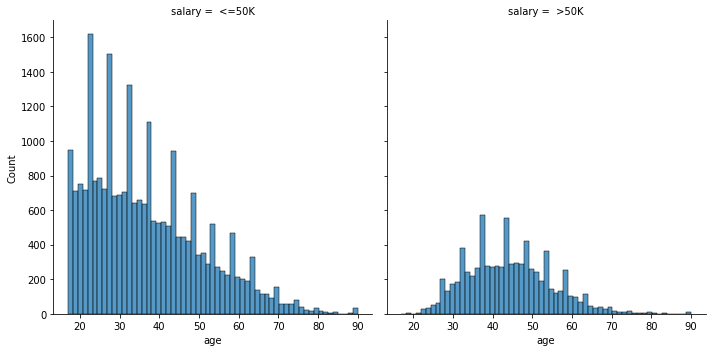

In [ ]:
sns.displot(data=income, x="age", col="salary")

In [ ]:
income.loc[income['age'].between(0, 25, 'both'), 'age_bin'] = 'entry_level'
income.loc[income['age'].between(25, 35, 'right'), 'age_bin'] = 'early_career'
income.loc[income['age'].between(35, 50, 'right'), 'age_bin'] = 'mid_career'
income.loc[income['age'].between(50, 65, 'right'), 'age_bin'] = 'late_career'
income.loc[income['age'].between(65, 90, 'right'), 'age_bin'] = 'retirement'

In [ ]:
print(income['education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [ ]:
income.loc[income['education'] == ' Preschool', 'education'] = 'elementary'
income.loc[income['education'] == ' 1st-4th', 'education'] = 'elementary'
income.loc[income['education'] == ' 5th-6th', 'education'] = 'middle_school'
income.loc[income['education'] == ' 7th-8th', 'education'] = 'middle_school'
income.loc[income['education'] == ' 9th', 'education'] = 'high_school'
income.loc[income['education'] == ' 10th', 'education'] = 'high_school'
income.loc[income['education'] == ' 11th', 'education'] = 'high_school'
income.loc[income['education'] == ' 12th', 'education'] = 'high_school'
print(income['education'].unique())

[' Bachelors' ' HS-grad' 'high_school' ' Masters' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' 'middle_school' ' Doctorate' ' Prof-school'
 'elementary']


In [ ]:
income.head()

,age,workclass,final_weight,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours_per_week,native_country,salary,age_bin
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,mid_career
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,mid_career
2,53,Private,234721,high_school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,late_career
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,early_career
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,mid_career


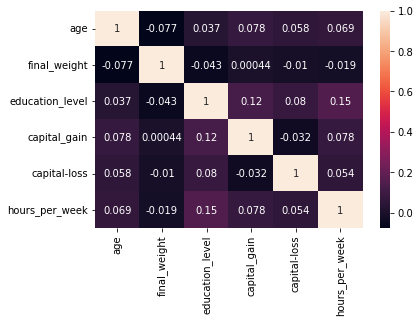

In [ ]:
ax = sns.heatmap(income.corr(), annot=True)

In [ ]:
income = income.drop('age', axis=1)
income = income.drop('education_level', axis=1)
income.head()

,workclass,final_weight,education,marital_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours_per_week,native_country,salary,age_bin
0,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,mid_career
1,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,mid_career
2,Private,234721,high_school,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,late_career
3,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,early_career
4,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,mid_career


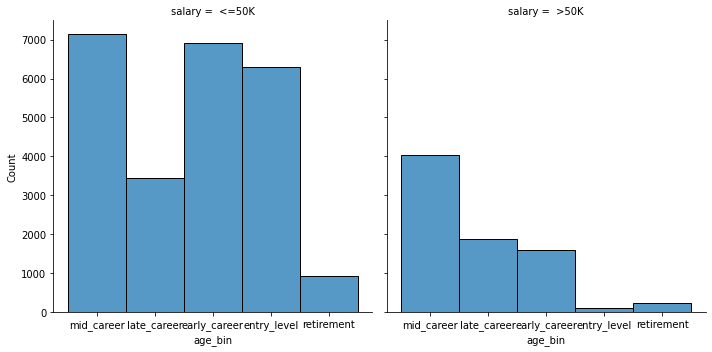

In [ ]:
sns.displot(data=income, x="age_bin", col="salary")

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

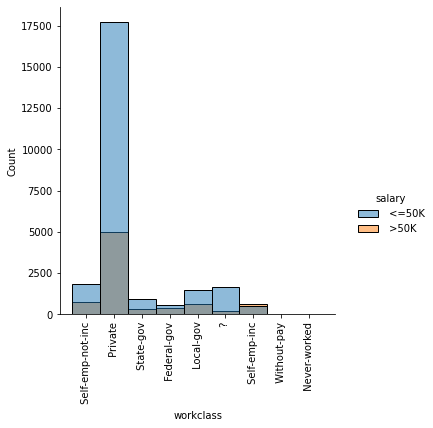

In [ ]:
chart = sns.displot(data=income, x="workclass", hue="salary")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

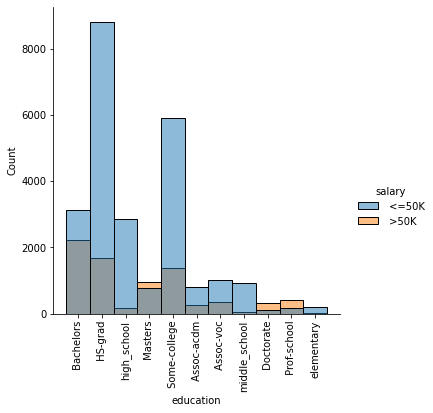

In [ ]:
chart = sns.displot(data=income, x="education", hue="salary")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

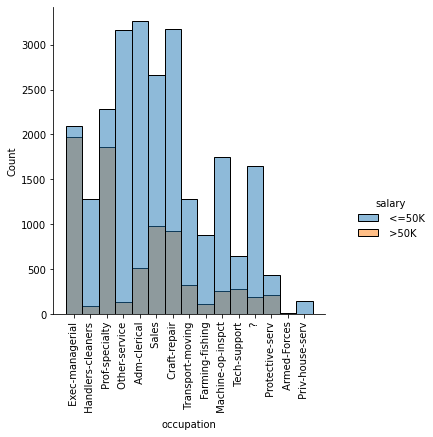

In [ ]:
chart = sns.displot(data=income, x="occupation", hue="salary")
plt.xticks(rotation=90)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

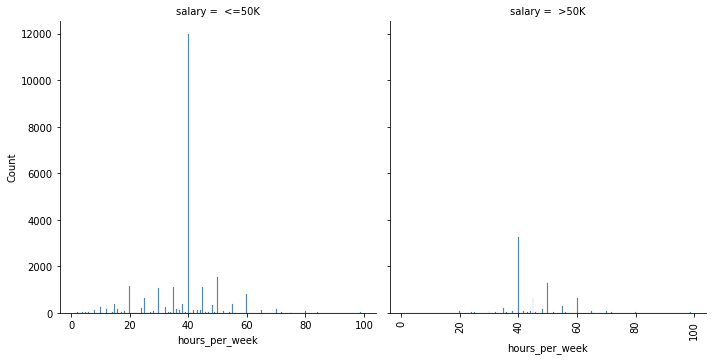

In [ ]:
chart = sns.displot(data=income, x="hours_per_week", col="salary")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

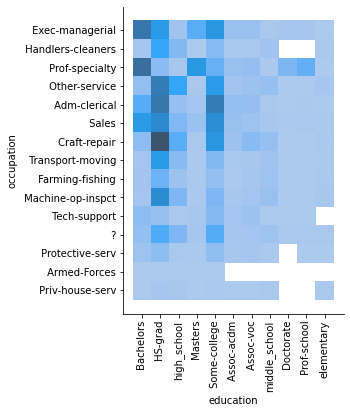

In [ ]:
sns.displot(data=income, x="education", y="occupation")
plt.xticks(rotation=90)

# Model

##Prep for Model

In [ ]:
income = income.drop(columns = ['capital_gain', 'capital-loss', 'hours_per_week', 'relationship']) 
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32560 non-null  object
 1   final_weight    32560 non-null  int64 
 2   education       32560 non-null  object
 3   marital_status  32560 non-null  object
 4   occupation      32560 non-null  object
 5   race            32560 non-null  object
 6   sex             32560 non-null  object
 7   native_country  32560 non-null  object
 8   salary          32560 non-null  object
 9   age_bin         32560 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


In [ ]:
income = pd.get_dummies(income, columns=['workclass', 'education','marital_status', 'occupation', 'race', 'sex', 'native_country', 'age_bin' ], prefix='', prefix_sep='')

In [ ]:
y = income['salary']
X = income.drop(columns = ['salary']) 
X_columns = X
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.30, random_state = 41)
X.head()

,final_weight,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,...,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,early_career,entry_level,late_career,mid_career,retirement
0,83311,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,215646,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,234721,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,338409,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,284582,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [ ]:
 scaler = MinMaxScaler()
X_scaler = scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   final_weight                 32560 non-null  int64
 1    ?                           32560 non-null  uint8
 2    Federal-gov                 32560 non-null  uint8
 3    Local-gov                   32560 non-null  uint8
 4    Never-worked                32560 non-null  uint8
 5    Private                     32560 non-null  uint8
 6    Self-emp-inc                32560 non-null  uint8
 7    Self-emp-not-inc            32560 non-null  uint8
 8    State-gov                   32560 non-null  uint8
 9    Without-pay                 32560 non-null  uint8
 10   Assoc-acdm                  32560 non-null  uint8
 11   Assoc-voc                   32560 non-null  uint8
 12   Bachelors                   32560 non-null  uint8
 13   Doctorate                   32560 non-null  u

## Build Model

## KNN Nearest Neighbors

In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors=3)
KNNclf.fit(X_train, y_train)
KNN_predictions = KNNclf.predict(X_test)
accuracy_score(y_test, KNN_predictions)

0.7986574236574236

In [ ]:
print(classification_report(y_test, KNN_predictions))

              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87     17293
        >50K       0.59      0.56      0.57      5499

    accuracy                           0.80     22792
   macro avg       0.72      0.72      0.72     22792
weighted avg       0.80      0.80      0.80     22792



In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors=4)
KNNclf.fit(X_train, y_train)
KNN_predictions_4 = KNNclf.predict(X_test)
accuracy_score(y_test, KNN_predictions_4)

0.8085731835731835

In [ ]:
print(classification_report(y_test, KNN_predictions_4))

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88     17293
        >50K       0.65      0.44      0.53      5499

    accuracy                           0.81     22792
   macro avg       0.75      0.68      0.70     22792
weighted avg       0.79      0.81      0.79     22792



In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors=5)
KNNclf.fit(X_train, y_train)
KNN_predictions_5 = KNNclf.predict(X_test)
accuracy_score(y_test, KNN_predictions_5)

0.8088803088803089

In [ ]:
print(classification_report(y_test, KNN_predictions_5))

              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.88     17293
        >50K       0.62      0.55      0.58      5499

    accuracy                           0.81     22792
   macro avg       0.74      0.72      0.73     22792
weighted avg       0.80      0.81      0.81     22792



## Undersampling

In [ ]:
rus = RandomUnderSampler(random_state = 1)
X, y = rus.fit_resample(X_train, y_train)

In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors = 3)
KNNclf.fit(X, y)
KNN_pred= KNNclf.predict(X_test)
accuracy_score(y_test, KNN_pred)

0.7365742365742366

In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.72      0.81     17293
        >50K       0.47      0.80      0.59      5499

    accuracy                           0.74     22792
   macro avg       0.69      0.76      0.70     22792
weighted avg       0.81      0.74      0.75     22792



In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors = 4)
KNNclf.fit(X, y)
KNN_pred= KNNclf.predict(X_test)
accuracy_score(y_test, KNN_pred)

0.7766321516321516

In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

       <=50K       0.90      0.80      0.84     17293
        >50K       0.53      0.71      0.60      5499

    accuracy                           0.78     22792
   macro avg       0.71      0.75      0.72     22792
weighted avg       0.81      0.78      0.79     22792



In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors = 5)
KNNclf.fit(X, y)
KNN_pred= KNNclf.predict(X_test)
accuracy_score(y_test, KNN_pred)

0.7445594945594946

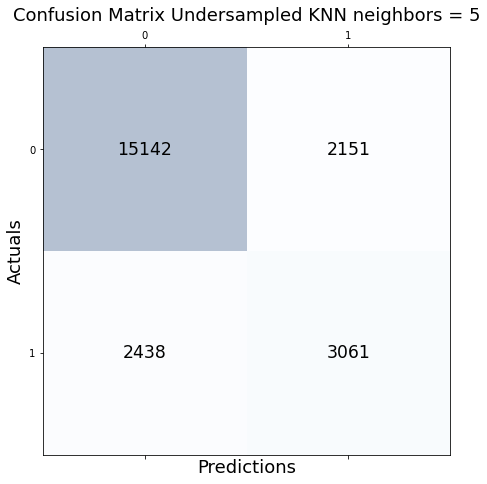

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Undersampled KNN neighbors = 5', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.72      0.81     17293
        >50K       0.48      0.82      0.61      5499

    accuracy                           0.74     22792
   macro avg       0.70      0.77      0.71     22792
weighted avg       0.82      0.74      0.76     22792



## Oversampling

In [ ]:
random_oversampler = RandomOverSampler(random_state = 1)
X, y = random_oversampler.fit_resample(X_train, y_train)

In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors = 3)
KNNclf.fit(X, y)
KNN_pred= KNNclf.predict(X_test)
accuracy_score(y_test, KNN_pred)

0.7486837486837487

In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.76      0.82     17293
        >50K       0.49      0.72      0.58      5499

    accuracy                           0.75     22792
   macro avg       0.69      0.74      0.70     22792
weighted avg       0.80      0.75      0.76     22792



In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors = 4)
KNNclf.fit(X, y)
KNN_pred= KNNclf.predict(X_test)
accuracy_score(y_test, KNN_pred)

0.7646103896103896

In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.79      0.84     17293
        >50K       0.51      0.68      0.58      5499

    accuracy                           0.76     22792
   macro avg       0.70      0.74      0.71     22792
weighted avg       0.80      0.76      0.78     22792



In [ ]:
KNNclf = KNeighborsClassifier(n_neighbors = 5)
KNNclf.fit(X, y)
KNN_pred= KNNclf.predict(X_test)
accuracy_score(y_test, KNN_pred)

0.7415321165321165

In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.73      0.81     17293
        >50K       0.48      0.77      0.59      5499

    accuracy                           0.74     22792
   macro avg       0.69      0.75      0.70     22792
weighted avg       0.80      0.74      0.76     22792



## Decision Tree

In [ ]:
treeclf = DecisionTreeClassifier(max_depth=6, splitter='random')
treeclf.fit(X_train, y_train)
treetest_predictions = treeclf.predict(X_test)
accuracy_score(y_test, treetest_predictions)

0.822964197964198

In [ ]:
print(classification_report(y_test, treetest_predictions))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89     17293
        >50K       0.70      0.46      0.56      5499

    accuracy                           0.82     22792
   macro avg       0.77      0.70      0.72     22792
weighted avg       0.81      0.82      0.81     22792



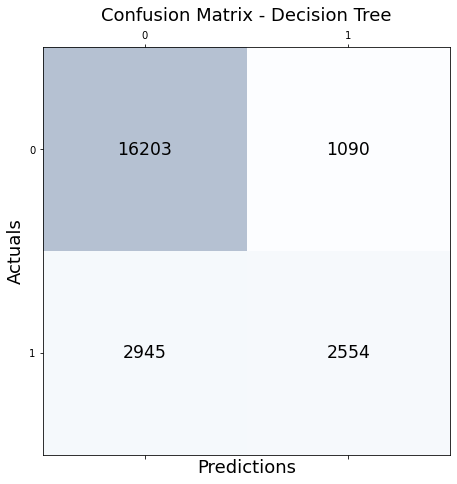

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=treetest_predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Decision Tree', fontsize=18)
plt.show()

In [ ]:
extratreeclf = ExtraTreeClassifier(max_depth=6, splitter='random')
extratreeclf.fit(X_train, y_train)
extratreetest_predictions = extratreeclf.predict(X_test)
accuracy_score(y_test, extratreetest_predictions)

0.7548262548262549

In [ ]:
print(classification_report(y_test, extratreetest_predictions))

              precision    recall  f1-score   support

       <=50K       0.79      0.92      0.85     17293
        >50K       0.48      0.22      0.31      5499

    accuracy                           0.75     22792
   macro avg       0.64      0.57      0.58     22792
weighted avg       0.72      0.75      0.72     22792

